<a href="https://colab.research.google.com/github/Ware-Hard-or-Soft/ML-DL-projects/blob/main/Accelerating_Deep_Learning_Models_for_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Leveraging the computational power of GPUs to accelerate the training of neural networks in PyTorch. The code involves:

1. Setting up GPU for PyTorch: The code starts by verifying if a GPU is available and initializing it. The model and data are moved from the CPU to the GPU to take advantage of faster computations.
2. Build CNN from scratch or Using Pre-trained ResNet-18 Model: A ResNet-18 pre-trained model is used, which has been fine-tuned with the CIFAR-10 dataset, a standard dataset used for image classification tasks.
3. Transfer Learning: The code provides options for transfer learning:
Freezing some of the pre-trained layers to speed up training while keeping the rest of the layers trainable.
4. Loading and fine-tuning the model on the CIFAR-10 dataset to improve the classification accuracy.
5. Training Loop: The model is trained using Stochastic Gradient Descent (SGD) with a cross-entropy loss function. The training process is performed over multiple epochs, and the loss is reported at regular intervals.
6. Evaluation of Model: After training, the model's performance is evaluated on a test set, and the accuracy on the CIFAR-10 dataset is printed.

Author :Dongqi Zheng

In [1]:
import torch
print(f'Can I can use GPU now? -- {torch.cuda.is_available()}')

Can I can use GPU now? -- True


In [2]:
import torch.nn as nn
rand_tensor = torch.rand(5,2)
simple_model = nn.Sequential(nn.Linear(2,10), nn.ReLU(), nn.Linear(10,1))
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

device = torch.device('cuda')
# ----------- <Your code> ---------------
# Move rand_tensor and model onto the GPU device

simple_model=simple_model.to(device)
rand_tensor=rand_tensor.to(device)

# --------- <End your code> -------------
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

input is on cpu
model parameters are on [device(type='cpu'), device(type='cpu'), device(type='cpu'), device(type='cpu')]
output is on cpu
input is on cuda:0
model parameters are on [device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0)]
output is on cuda:0


In [3]:

import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
#--MINST load
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('/data', train=False, download=True, transform=transform)

batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

batch_idx, (images, targets) = next(enumerate(train_loader))
#---OurFC


class OurCNN(nn.Module):

  def __init__(self):
    super(OurCNN, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(432, 10)

  def forward(self, x):
    x = self.conv(x)
    x = F.relu(F.max_pool2d(x,2))
    x = x.view(-1, 432)
    x = F.relu(self.fc(x))
    return F.log_softmax(x,-1)



def train(classifier, epoch):

  classifier.train()

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.cross_entropy(output, targets)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0:
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0:
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')

def test(classifier, epoch):

  classifier.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.cross_entropy(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(targets.data.view_as(pred)).sum()

  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')
#--Implementation
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

classifier = OurCNN()
optimizer = optim.SGD(classifier.parameters(), lr=0.05, momentum=0.8)
for epoch in range(1, max_epoch+1):
  train(classifier, epoch)
  test(classifier, epoch)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 15915676.97it/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 483153.23it/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4393946.35it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4315933.11it/s]


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

Epoch 1: [0/60000] Loss: 2.2840781211853027
Epoch 1: [6400/60000] Loss: 0.8914243578910828
Epoch 1: [12800/60000] Loss: 0.5941224694252014
Epoch 1: [19200/60000] Loss: 0.4540316164493561
Epoch 1: [25600/60000] Loss: 0.2585507929325104
Epoch 1: [32000/60000] Loss: 0.3928629755973816
Epoch 1: [38400/60000] Loss: 0.36925435066223145
Epoch 1: [44800/60000] Loss: 0.4000798761844635
Epoch 1: [51200/60000] Loss: 0.4184618890285492
Epoch 1: [57600/60000] Loss: 0.32626786828041077
Test result on epoch 1: Avg loss is 0.3382936828613281, Accuracy: 87.33999633789062%
Epoch 2: [0/60000] Loss: 0.3188709318637848
Epoch 2: [6400/60000] Loss: 0.5033968091011047
Epoch 2: [12800/60000] Loss: 0.5068771839141846
Epoch 2: [19200/60000] Loss: 0.23884353041648865
Epoch 2: [25600/60000] Loss: 0.2021181881427765
Epoch 2: [32000/60000] Loss: 0.36667028069496155
Epoch 2: [38400/60000] Loss: 0.34921500086784363
Epoch 2: [44800/60000] Loss: 0.

In [4]:

inputSize=784
hiddenSize=100
outputSize=10

class OurFC(nn.Module):
    def __init__(self):
        super(OurFC, self).__init__()
        self.inputSize=inputSize
        self.l1 = nn.Linear(inputSize, hiddenSize)
        self.l3 = nn.Linear(hiddenSize, outputSize)

    def forward(self, x):
        x = x.view(-1, self.inputSize)
        x = self.l1(x)
        x = self.l3(x)
        return F.log_softmax(x)

train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

classifier = OurFC()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)
for epoch in range(1, max_epoch+1):
  train(classifier, epoch)
  test(classifier, epoch)


Epoch 1: [0/60000] Loss: 2.4171440601348877


<ipython-input-4-82a5f1850287>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch 1: [6400/60000] Loss: 0.47505098581314087
Epoch 1: [12800/60000] Loss: 0.6048062443733215
Epoch 1: [19200/60000] Loss: 0.2440565824508667
Epoch 1: [25600/60000] Loss: 0.32572272419929504
Epoch 1: [32000/60000] Loss: 0.42253249883651733
Epoch 1: [38400/60000] Loss: 0.35555320978164673
Epoch 1: [44800/60000] Loss: 0.21290792524814606
Epoch 1: [51200/60000] Loss: 0.18792670965194702
Epoch 1: [57600/60000] Loss: 0.6089798212051392
Test result on epoch 1: Avg loss is 0.2949097984313965, Accuracy: 91.62000274658203%
Epoch 2: [0/60000] Loss: 0.2084326595067978
Epoch 2: [6400/60000] Loss: 0.5127294659614563
Epoch 2: [12800/60000] Loss: 0.22638379037380219
Epoch 2: [19200/60000] Loss: 0.6166138648986816
Epoch 2: [25600/60000] Loss: 0.18957380950450897
Epoch 2: [32000/60000] Loss: 0.35854873061180115
Epoch 2: [38400/60000] Loss: 0.46629005670547485
Epoch 2: [44800/60000] Loss: 0.42843499779701233
Epoch 2: [51200/60000] Loss: 0.49654456973075867
Epoch 2: [57600/60000] Loss: 0.24347755312919

In [5]:
# Compare the paramters
OurFC_total_params = sum(p.numel() for p in OurFC().parameters())
print(f'Number of Params in OurFC is {OurFC_total_params}')
OurCNN_total_params = sum(p.numel() for p in OurCNN().parameters())
print(f'Number of Params in OurCNN is {OurCNN_total_params}')

Number of Params in OurFC is 79510
Number of Params in OurCNN is 4408


CNNs take advantage of the spatial structure of images, use fewer parameters, offer better translation invariance, and excel at learning hierarchical features.
Fully connected layers, on the other hand, do not capture spatial information and are computationally less efficient for large images, leading to overfitting and poor generalization.

##Train classifier on CIFAR-10 data.

In [8]:
# ----------- <Your code> ---------------
!pip install torchvision
import torchvision
import torchvision.transforms as transforms # This line imports the necessary transforms module

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 9

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 49692068.29it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


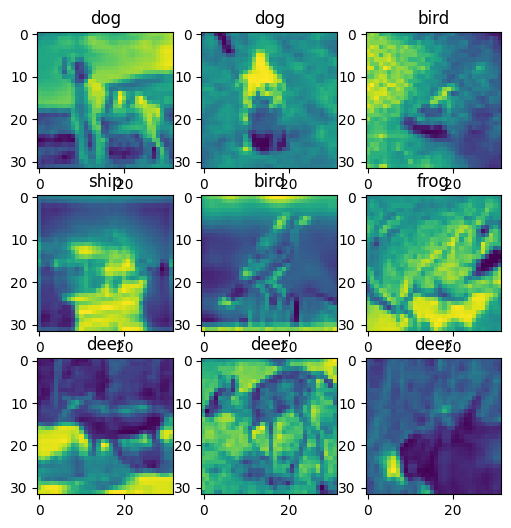

In [9]:
batch_idx, (images2, targets) = next(enumerate(trainloader))
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3)
fig.set_size_inches(6,6)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(images2[i*3+j][0])
    ax[i,j].set_title(f'{classes[targets[i*3+j]]}')
fig.show()

### Create CNN and train it




In [12]:
# ----------- <Your code> ---------------

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Task2CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Task2CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



In [13]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is done')

[1,  2000] loss: 1.997
[1,  4000] loss: 1.612
[2,  2000] loss: 1.411
[2,  4000] loss: 1.343
Training is done


In [14]:
correct = 0
total = 0
predictedList=[]
originalList=[]
missImageList=[]

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #print(labels)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        m=(predicted == labels).sum().item()
        #print(m)
        if (m==0):
           #print("bad")
           predictedList.append(predicted)

           originalList.append(labels)
           missImageList.append(images)
           #print(missImageList)
        correct += (predicted == labels).sum().item()


print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


### Plot misclassified test images


<ipython-input-15-4e00aea4fc5b>:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3697.)
  ax[i].imshow(missImageList[0][i].T)


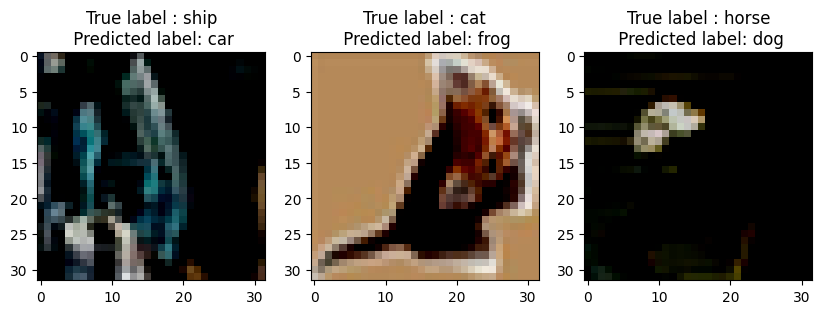

In [15]:
# ----------- <Your code> ---------------
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,3)
for i in range(3):
    ax[i].imshow(missImageList[0][i].T)
    ax[i].set_title(f'True label : {classes[originalList[0][i]]}\n Predicted label: {classes[predictedList[0][i]]}')

fig.show()

## Transfer Learning

use a pretrained CNN for CIFAR-10 classification.

`torchvision.models` (https://pytorch.org/vision/stable/models.html) contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection and video classification.
 Resnet-18, read this paper https://arxiv.org/pdf/1512.03385.pdf.

In [16]:
# ----------- <Your code> ---------------
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
#resnet_total_params = sum(p.numel() for p in resnet18.parameters())
#print(resnet_total_params)
resnet18=resnet18.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s]


### Create data loaders for CIFAR-10

preprocess the CIFAR-10 data to make sure it has a height and width. See [`torchvision.transforms.Resize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize).


In [17]:
# ----------- <Your code> ---------------
from torchvision import transforms
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])


batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader2 = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)




Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


### test data on pretrained model

In [18]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader2:
        images, labels = data
        images, labels =images.to(device),labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 0 %


###  Update model for CIFAR-10

(1) You can try to directly continue to train the model you load with the CIFAR-10 training data.

(2) For efficiency, you can try to freeze part of the parameters of the loaded models. For example, you can first freeze all parameters by

```
for param in model.parameters():
    param.requires_grad = False
```
and then unfreeze the last few layers by setting `somelayer.requires_grad=True`.


In [19]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)


for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
          inputs = inputs.to(device)
          labels = labels.to(device)
          outputs = resnet18(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
          if i % 2000 == 1999:
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0

print('Training is done')


[1,  2000] loss: 1.669
[1,  4000] loss: 1.007
[1,  6000] loss: 0.854
[1,  8000] loss: 0.752
[1, 10000] loss: 0.685
[1, 12000] loss: 0.619
Training is done


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader2:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 80 %
